Text(0.5, 1.0, 'Difference between black and white')

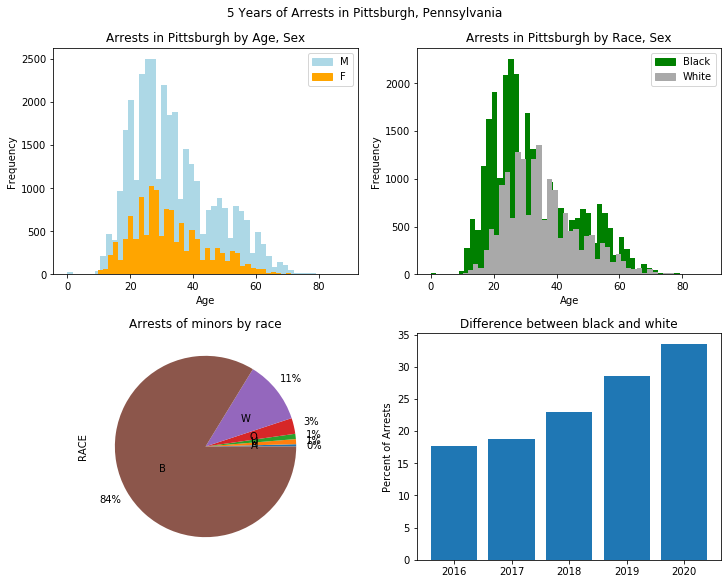

In [20]:
import pandas as pd
import matplotlib as mpl; import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

"""
    Who gets arrested in Pittsburgh?
    
    Here I take a quick look at the Pittsburgh Police Arrest Data set from 
    the Western PA Regional Data Center (https://data.wprdc.org/dataset/arrest-data)
    and break down arrests by age, sex and race.
    
    Notably absent columns in the data set?
    - Use of force
    - Arresting officer
    
    By plotting the demographic information in the dataset, we can see 
    enormous disparities between white and black residents of Pittsburgh.
    The problem is particularly acute when the arrests involve children and
    is getting worse year after year. 
"""

# 
arrests = pd.read_csv('C:/Users/raana/Downloads/arrests.csv')
# looks like some 999 year olds were arrested?? Don't think so
arrests = arrests[arrests.AGE<90]

# Let's create a multi-panel subplot to make multiple visualizations
fig, axs = plt.subplots(2,2,figsize=(10,8), constrained_layout=True)
fig.suptitle('5 Years of Arrests in Pittsburgh, Pennsylvania')

# Age and Sex
ax = axs[0][0]
arrests[arrests.GENDER=='M'].AGE.plot.hist(color='lightblue',bins=50, ax=ax)
arrests[arrests.GENDER=='F'].AGE.plot.hist(color='orange',bins=50, ax=ax)
Mpatch = mpatches.Patch(color='lightblue', label='M')
Fpatch = mpatches.Patch(color='orange', label='F')
ax.set_title('Arrests in Pittsburgh by Age, Sex')
ax.set_xlabel('Age')
ax.legend(handles=[Mpatch, Fpatch])

# Age and Race
ax = axs[0][1]
arrests[arrests.RACE=='B'].AGE.plot.hist(color='green',bins=50, ax=ax)
arrests[arrests.RACE=='W'].AGE.plot.hist(facecolor='darkgrey',bins=50, ax=ax)
Bpatch = mpatches.Patch(color='green', label='Black')
Wpatch = mpatches.Patch(color='darkgrey', label='White')
ax.set_title('Arrests in Pittsburgh by Race, Sex')
ax.set_xlabel('Age')
ax.legend(handles=[Bpatch, Wpatch])

# Race for arrests of minors
ax = axs[1][0]
arrests[arrests.AGE<18].RACE.value_counts().sort_values().plot.pie(
    autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.5, ax=ax)
ax.set_title('Arrests of minors by race')

# Racial disparity over time 
ax = axs[1][1]
arrests['Year'] = [int(i.split('-')[0]) for i in arrests.ARRESTTIME]
years = list(range(2016,2021))
disparity = []
for y in years:
    y_arrests = arrests[arrests.Year==y]
    count_black = len(y_arrests[y_arrests.RACE=='B'])
    count_white = len(y_arrests[y_arrests.RACE=='W'])
    d = (count_black/len(y_arrests)) - (count_white / len(y_arrests))
    disparity.append(d*100)
ax.bar(years, disparity)
ax.set_ylabel('Percent of Arrests')
ax.set_title('Difference between black and white')